In [1]:
make_table(name_basics,'C:/Users/Juice/Python_Projects/flatiron/class-materials/section01/projects/dsc-phase-1-project-online/unzipped_data/tn.movie_budgets.csv')

NameError: name 'make_table' is not defined

In [2]:
bom_movie_gross = pd.read_csv (r'C:\Users\Juice\Python_Projects\flatiron\class-materials\section01\projects\dsc-phase-1-project-online\unzipped_data\bom.movie_gross.csv')
bom_movie_gross.to_sql('bom_movie_gross', conn, if_exists='fail', index = False)

NameError: name 'pd' is not defined

## Questions

# What are the top grossing movies domestic and worldwide
   - Secondary - Highest profit movies=  (revenue - production cost)
- What crew is involved in the top movies
- Highest rated movies
- Relationship between ratings and revenue

Bonus Questions

- Top grossing genres, may need to scrape genres and map to movies
- Pre-post covid
- Top ratings rotten tomatos vs imdb
- 



- Look at movie_budgets for title, production budget, and domestic and worldwide gross
- Join title_basics with movie budgets for genres

In [302]:
import sqlite3
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
conn = sqlite3.connect('movies.db')
cur = conn.cursor()

In [5]:
cur.execute("""SELECT * FROM genre_ids;
          """)
genre_df = pd.DataFrame(cur.fetchall())
genre_df.columns = [x[0] for x in cur.description]
print(len(genre_df))
genre_df

19


,,id,name
0,0,28,Action
1,1,12,Adventure
2,2,16,Animation
3,3,35,Comedy
4,4,80,Crime
5,5,99,Documentary
6,6,18,Drama
7,7,10751,Family
8,8,14,Fantasy
9,9,36,History


In [6]:
cur.execute("""SELECT mb.release_date, mb.movie, mb.production_budget, mb.domestic_gross, mb.worldwide_gross, tm.genre_ids, tm.popularity, tm.vote_average, tm.vote_count FROM movie_budgets mb left join tmdb_movies tm on mb.movie = tm.title ;
          """)
gross_df = pd.DataFrame(cur.fetchall())
gross_df.columns = [x[0] for x in cur.description]
print(len(gross_df))
gross_df

6191


,release_date,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","[28, 12, 14, 878]",26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","[12, 28, 14]",30.579,6.4,8571
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",None,None,None,None
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","[28, 12, 878]",44.383,7.3,13457
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747","[14, 12, 878, 28]",34.293,7,8534
...,...,...,...,...,...,...,...,...,...
6186,"Dec 31, 2018",Red 11,"$7,000",$0,$0,None,None,None,None
6187,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",None,None,None,None
6188,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",None,None,None,None
6189,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,None,None,None,None


In [7]:
genre_dict = genre_df.set_index('id')['name'].to_dict()
genre_dict['28']

'Action'

In [8]:
def gid_to_gname():
    """ Used to access each item within a pandas series, enter the list, and replace genre id's with genre category it represents keeping the list intact.

    Parameters:

    None

    Returns:
    pd.Series: Updated series gathered from genre_dict key: value pairs.
    
    """
    for x in gross_df.genre_ids:
        print(x)
        if x != None:
            for i, ele in enumerate(x):
                if ele in genre_dict.keys():
                    x[i] = genre_dict[ele]
                    # print(ele)
                    print(x[i])
# .strip("[]").replace(',','').split(' ')

In [9]:
def clean_currency(df, column=None):
    """ Used for removing "$" and "," from currency

    Parameters:

    df (str) : Dataframe to perform cleaning function on
    column ( str): Column within dataframe to perform cleaning function on

    Returns:
    pd.Series: Cleaned df['column']
    
    """
    df[f'{column}'] = df[f'{column}'].apply(lambda x: x.replace(',','').replace('$',''))
    return df[f'{column}']

In [10]:
def to_numeric(df, column=None):
    """ Used for turning any appropriate column into numeric values

    Parameters:

    df (str) : Dataframe to perform numeric function on
    column ( str): Column within dataframe to perform numeric function on

    Returns:
    pd.Series: Numeric df['column']
    
    """
    df[f'{column}'] = pd.to_numeric(df[f'{column}'])
    return df[f'{column}']

In [11]:
gross_df = gross_df.sort_values(by='domestic_gross', ascending=False)
# gross_df.genre_ids = gross_df.genre_ids.apply(lambda x: '0' if x == None else x)
gross_df.genre_ids = gross_df.genre_ids.apply(lambda x: x.strip("[]").replace(',','').split(' ') if x != None else x)
gross_df.genre_ids = gross_df.genre_ids.apply(gid_to_gname())
gross_df.head()

 '10751']
Adventure
Comedy
Family
None
None
None
['53', '80']
Thriller
Crime
['28', '9648', '53']
Action
Mystery
Thriller
['53', '80']
Thriller
Crime
None
['35', '80']
Comedy
Crime
None
None
['35', '99', '28']
Comedy
Documentary
Action
None
['80', '18', '35']
Crime
Drama
Comedy
None
None
None
None
['12', '28', '53', '878']
Adventure
Action
Thriller
Science Fiction
None
None
None
None
None
None
['18']
Drama
None
None
['18', '10752']
Drama
War
None
None
['16', '12', '10751']
Animation
Adventure
Family
None
['35']
Comedy
None
['14', '18', '35', '10749', '10751']
Fantasy
Drama
Comedy
Romance
Family
['14', '18', '35', '10749', '10751']
Fantasy
Drama
Comedy
Romance
Family
['18', '10749']
Drama
Romance
None
['18']
Drama
None
None
None
['12', '35', '14', '10751']
Adventure
Comedy
Fantasy
Family
['18', '35']
Drama
Comedy
['35', '18', '10749']
Comedy
Drama
Romance
None
None
None
['35']
Comedy
['28', '53']
Action
Thriller
['35']
Comedy
None
None
None
None
None
None
None
None
None
None
['16', '12'

TypeError: 'NoneType' object is not callable

In [62]:
to_numeric(gross_df, column='popularity')

# gross_df.popularity.isna().value_counts()
gross_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,popularity,vote_average,vote_count
349,2008-07-04,AstÃ©rix aux Jeux Olympiques,113500000,999811,132999811,None,NaN,None,None
1718,2011-02-11,Gnomeo and Juliet,36000000,99967670,193737977,None,NaN,None,None
704,2018-08-03,Christopher Robin,75000000,99215042,197504758,"['Adventure', 'Comedy', 'Family', 'Fantasy']",20.931,7.4,1280
4685,1999-06-04,Desert Blue,5000000,99147,99147,None,NaN,None,None
771,1997-06-13,Hercules,70000000,99112101,250700000,"['Action', 'Adventure']",23.922,5.6,2606
...,...,...,...,...,...,...,...,...,...
5564,2017-03-07,Departure,1100000,0,27561,"['Romance', 'Drama']",0.885,10,1
5565,2009-04-07,Faith Like Potatoes,1100000,0,0,None,NaN,None,None
5566,2010-03-23,Lake Mungo,1100000,0,0,None,NaN,None,None
5567,2015-04-07,Silent Running,1100000,0,0,None,NaN,None,None


In [14]:
# genre_df.id = genre_df.id.apply(lambda x:'test'+ x if '10' in x else x
# )

In [15]:
# genre_df.id = genre_df.id.apply(lambda x:genre_df.name)

In [16]:
currency_list = ['domestic_gross','worldwide_gross','production_budget']

for i in currency_list:
    clean_currency(gross_df, column=i)
    gross_df[i] = pd.to_numeric(gross_df[i])

remove and split genre ids

3) Replace multiple values to multiple new values for an individual DataFrame column:

df['column name'] = df['column name'].replace(['1st old value','2nd old value',...],['1st new value','2nd new value',...])

Joined tmbd_movies to bom_movie_gross to identify top grossing movies and their genre's.
Ordered by both domestic and worldwide and saw top 20 to gather best options.
Noticed missing values due to inconsistencies in name or missing movies in files.

Chosing to make these edits from the source csv files so as to not accidentally rewrite when running cells/scripts

Manually updated within top 15 domestic grossing movies that failed join from base csv gathered directly from tmdb api

- Star Wars Ep VII: The Force Awakens
- Titanic - missing completely, adding pertinent details to file
- Star Wars Ep VIII: The Last Jedi
- Star Wars Ep. I: The Phantom Menace - missing completely, adding pertinent details to file
- Star Wars Ep. IV: A New Hope - missing completely, adding pertinent details to file

Manually updated within top 15 worldwide grossing movies that failed join from base csv
- Titanic - missing completely, adding pertinent details to file
- Star Wars Ep VII: The Force Awakens
- Harry Potter and the Deathly Hallows: Part II
- Star Wars Ep. VIII: The Last Jedi



In [17]:
# gross_df.sort_values(by='domestic_gross', ascending=False).head(25)
# gross_df[gross_df.genre_ids == 'None'].to_csv('none_genre.csv')

PermissionError: [Errno 13] Permission denied: 'none_genre.csv'

In [18]:
def to_date(df, column=None):
    """ Used for turning strings to date type pandas series

    Parameters:

    df (str) : Dataframe to perform date function on
    column ( str): Column within dataframe to date cleaning function on

    Returns:
    pd.Series: date type df['column']
    
    """
    df[f'{column}'] = pd.to_datetime(df[f'{column}'])
    return df[f'{column}']

In [19]:
to_date(gross_df, column='release_date')

349    2008-07-04
1718   2011-02-11
704    2018-08-03
4685   1999-06-04
771    1997-06-13
          ...    
5564   2017-03-07
5565   2009-04-07
5566   2010-03-23
5567   2015-04-07
5103   2013-01-15
Name: release_date, Length: 6191, dtype: datetime64[ns]

In [20]:
top15dom = gross_df.sort_values(by='domestic_gross', ascending=False).drop_duplicates(subset=['movie'], keep='last').head(15)
top15ww = gross_df.sort_values(by='worldwide_gross', ascending=False).drop_duplicates(subset=['movie'], keep='last').head(15)
low15dom = gross_df[gross_df['domestic_gross'] != 0].sort_values(by='domestic_gross', ascending=True).drop_duplicates(subset=['movie'], keep='last').head(15)
low15ww = gross_df.sort_values(by='worldwide_gross', ascending=True).drop_duplicates(subset=['movie'], keep='last').head(15)



In [332]:
top15ww.sort_values(by='popularity')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,popularity,vote_average,vote_count
47,2018-02-16,Black Panther,200000000,700059566,1348258224,"[Action, Animation]",2.058,5.1,11
74,2015-04-03,Furious 7,190000000,353007020,1518722794,"[Action, Crime, Thriller]",20.396,7.3,6538
36,2015-06-12,Jurassic World,215000000,652270625,1648854864,"[Action, Adventure, Science Fiction, Thriller]",20.709,6.6,14056
0,2009-12-18,Avatar,425000000,760507625,2776345279,"[Action, Adventure, Fantasy, Science Fiction]",26.526,7.4,18676
25,2017-04-14,The Fate of the Furious,250000000,225764765,1234846267,"[Action, Crime, Thriller]",28.668,6.9,6335
296,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,"[Family, Fantasy, Adventure]",29.206,8.1,11567
54,2013-05-03,Iron Man 3,200000000,408992272,1215392272,"[Action, Adventure, Science Fiction]",32.093,6.9,14155
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,"[Action, Adventure, Science Fiction, Fantasy]",32.281,7.4,12641
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,"[Fantasy, Adventure, Science Fiction, Action]",34.293,7,8534
127,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,"[Action, Adventure, Science Fiction]",34.958,6.5,5995


Turn columns into int

In [22]:
bar

NameError: name 'bar' is not defined

In [23]:
gross_df.genre_ids = gross_df.genre_ids.apply(lambda x: str(x))
genbar = gross_df.drop_duplicates(subset=['movie'], keep='last').sort_values(by='domestic_gross', ascending=False).head(15)
genbar = genbar.groupby(by='genre_ids').sum().sort_values(by='domestic_gross', ascending=False)
genbar

,production_budget,domestic_gross,worldwide_gross
genre_ids,,,
"['Action', 'Adventure', 'Science Fiction']",530600000,991183192,2452116819
"['Action', 'Crime', 'Drama', 'Thriller']",460000000,981860046,2086435306
"['Action', 'Adventure', 'Science Fiction', 'Fantasy']",306000000,936662225,2053311220
"['Adventure', 'Action', 'Science Fiction']",126000000,935542684,1813642684
"['Action', 'Adventure', 'Fantasy', 'Science Fiction']",425000000,760507625,2776345279
"['Action', 'Animation']",200000000,700059566,1348258224
"['Adventure', 'Action', 'Fantasy']",300000000,678815482,2048134200
"['Drama', 'Romance']",200000000,659363944,2208208395
"['Action', 'Adventure', 'Science Fiction', 'Thriller']",215000000,652270625,1648854864


In [24]:
gross_df.genre_ids = gross_df.genre_ids.apply(lambda x: str(x))
lowgen = gross_df[gross_df['domestic_gross'] != 0].drop_duplicates(subset=['movie'], keep='last').sort_values(by='domestic_gross', ascending=True).head(15)
lowgen = lowgen.groupby(by='genre_ids').sum().sort_values(by='domestic_gross', ascending=False)
lowgen

,production_budget,domestic_gross,worldwide_gross
genre_ids,,,
None,11027000,6556,6556
"['Thriller', 'Action', 'Drama']",9000000,1242,1242
[''],1000000,1036,1036
['Drama'],30000000,918,168832
['Action'],4600000,728,731767
"['Action', 'Science Fiction', 'Thriller']",500000,528,528
['Documentary'],10000000,388,247565


In [25]:
type(lowgen.index[0]

SyntaxError: unexpected EOF while parsing (<ipython-input-25-b0ca1b202525>, line 1)

In [26]:
gross_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,popularity,vote_average,vote_count
349,2008-07-04,AstÃ©rix aux Jeux Olympiques,113500000,999811,132999811,None,None,None,None
1718,2011-02-11,Gnomeo and Juliet,36000000,99967670,193737977,None,None,None,None
704,2018-08-03,Christopher Robin,75000000,99215042,197504758,"['Adventure', 'Comedy', 'Family', 'Fantasy']",20.931,7.4,1280
4685,1999-06-04,Desert Blue,5000000,99147,99147,None,None,None,None
771,1997-06-13,Hercules,70000000,99112101,250700000,"['Action', 'Adventure']",23.922,5.6,2606
...,...,...,...,...,...,...,...,...,...
5564,2017-03-07,Departure,1100000,0,27561,"['Romance', 'Drama']",0.885,10,1
5565,2009-04-07,Faith Like Potatoes,1100000,0,0,None,None,None,None
5566,2010-03-23,Lake Mungo,1100000,0,0,None,None,None,None
5567,2015-04-07,Silent Running,1100000,0,0,None,None,None,None


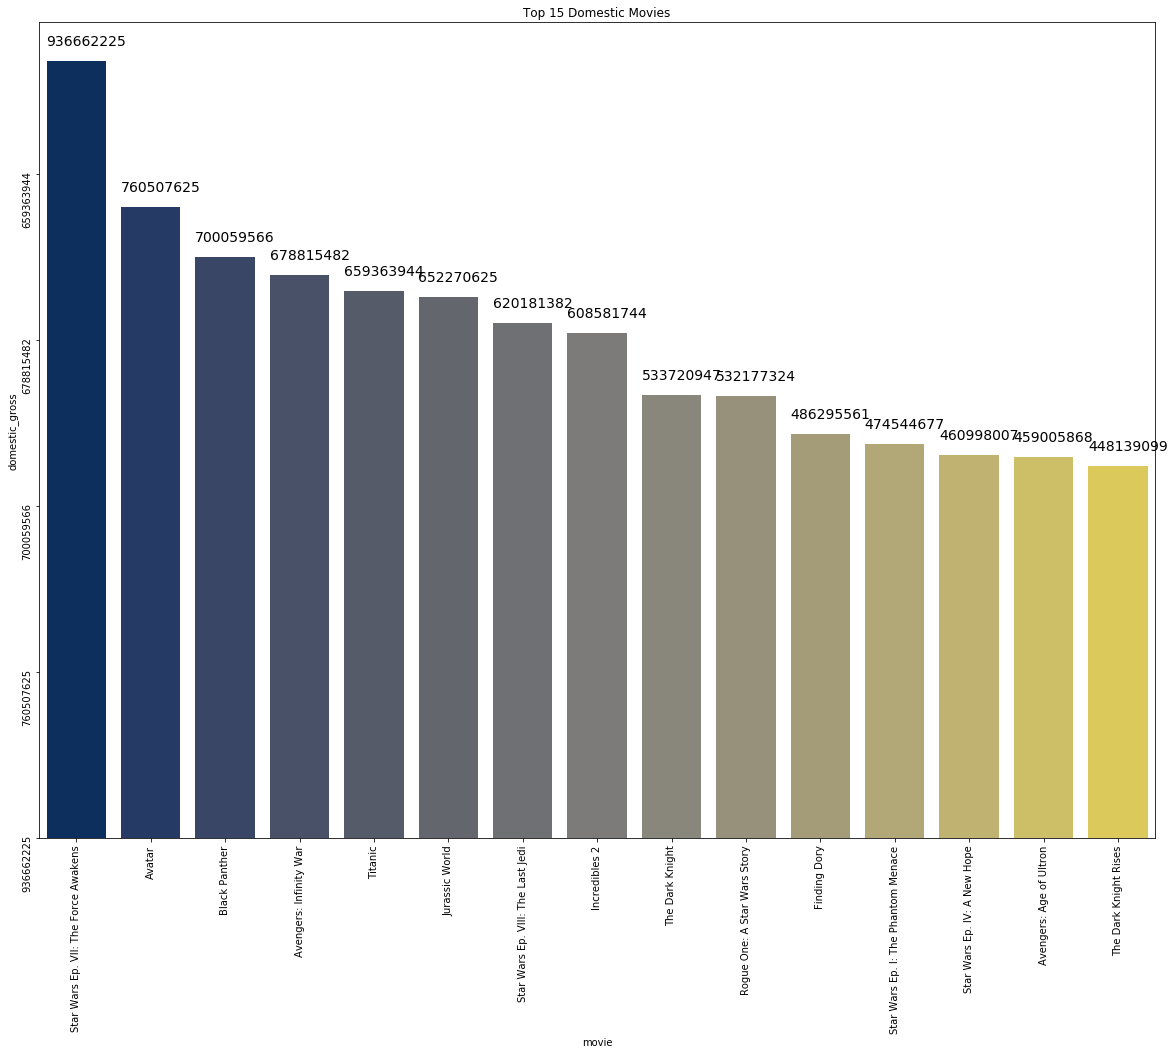

In [27]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.barplot(x="movie", y="domestic_gross", data=top15dom, palette='cividis', ax=ax)
ax.set_title('Top 15 Domestic Movies')
ax.set_xticklabels(labels=top15dom.movie,rotation=90)
ax.set_yticklabels(labels=top15dom.domestic_gross,rotation=90)
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(10, 20),
                 textcoords='offset points');

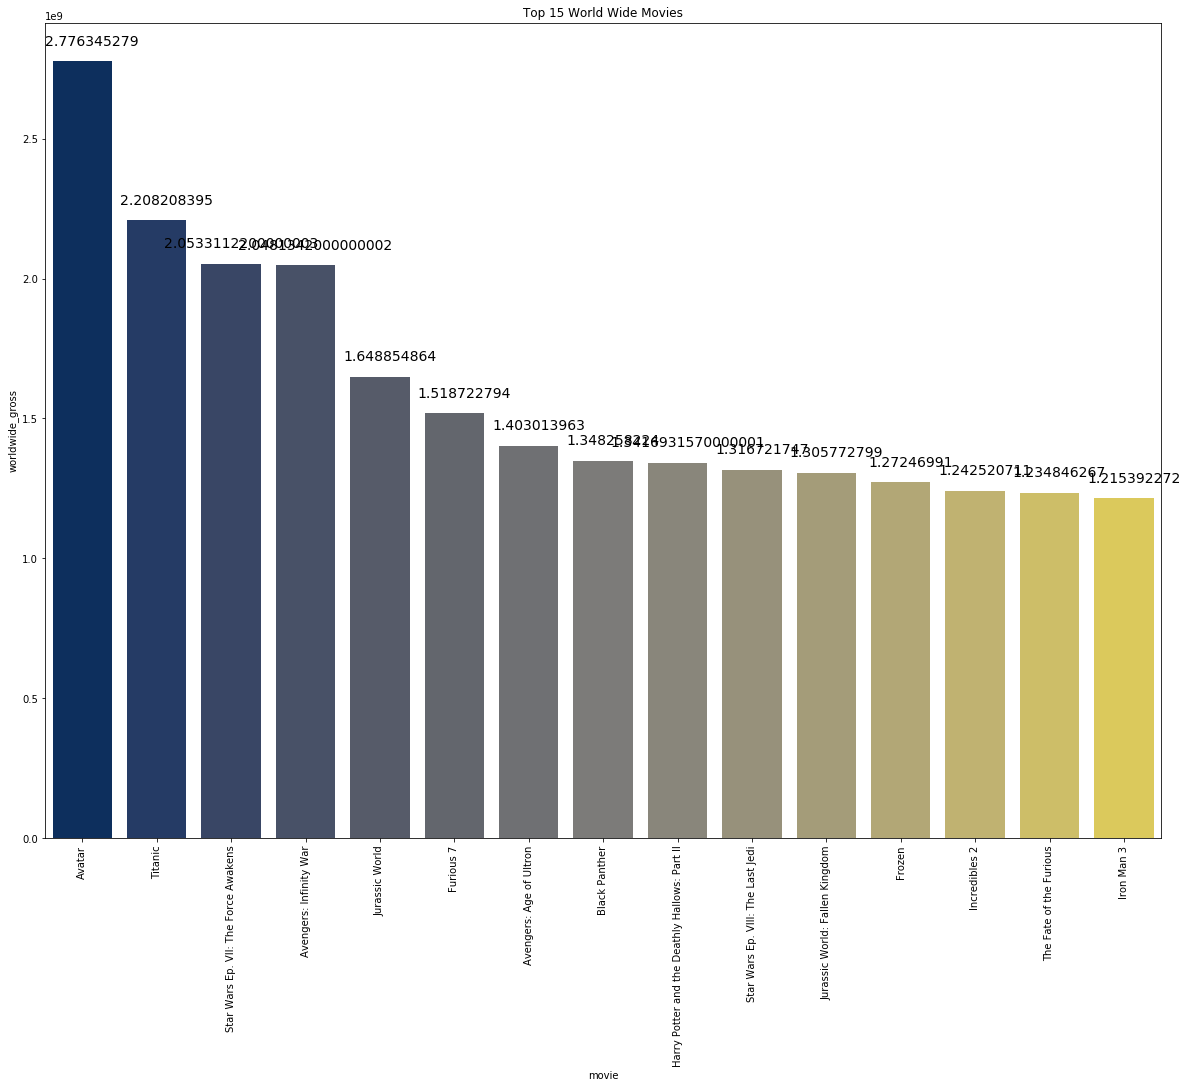

In [28]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.barplot(x="movie", y="worldwide_gross", data=top15ww, palette='cividis', ax=ax)
ax.set_title('Top 15 World Wide Movies')
ax.set_xticklabels(labels=top15ww.movie,rotation=90)
# ax.set_yticklabels(labels=top15ww.worldwide_gross,rotation=90)
for p in ax.patches:
             ax.annotate(.000000001 * p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),b
                 ha='center', va='center', fontsize=14, color='black', xytext=(10, 20),
                 textcoords='offset points' );

In [407]:
top15ww

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,popularity,vote_average,vote_count
0,2009-12-18,Avatar,425000000,760507625,2776345279,"[Action, Adventure, Fantasy, Science Fiction]",26.526,7.4,18676
48,1997-12-19,Titanic,200000000,659363944,2208208395,"[Drama, Romance]",50.39,7.9,17632
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,"[Action, Adventure, Science Fiction, Fantasy]",32.281,7.4,12641
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,"[Adventure, Action, Fantasy]",80.773,8.3,13948
36,2015-06-12,Jurassic World,215000000,652270625,1648854864,"[Action, Adventure, Science Fiction, Thriller]",20.709,6.6,14056
74,2015-04-03,Furious 7,190000000,353007020,1518722794,"[Action, Crime, Thriller]",20.396,7.3,6538
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,"[Action, Adventure, Science Fiction]",44.383,7.3,13457
47,2018-02-16,Black Panther,200000000,700059566,1348258224,"[Action, Animation]",2.058,5.1,11
296,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,"[Family, Fantasy, Adventure]",29.206,8.1,11567
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,"[Fantasy, Adventure, Science Fiction, Action]",34.293,7,8534


In [551]:
fig = go.Figure(data=[
    go.Bar(name='World Wide', x=top15ww.movie, y=top15ww.worldwide_gross, yaxis='y', marker=dict(color="burlywood")),
    go.Bar(name='Domestic', x=top15ww.movie, y=top15ww.domestic_gross, yaxis='y', marker=dict(color="peachpuff"), opacity=1.0),
    go.Bar(name='Production Budget', x=top15ww.movie, y=top15ww.production_budget, yaxis='y', marker=dict(color="#b36360"), opacity=1.0),
    # go.Scatter(name='Popularity', x=top15ww.movie, y=top15ww.popularity, mode='markers',marker_symbol='star', yaxis='y2', marker=dict(color='#8b345c',size=10, opacity=0.8, line=dict(width=1, color='#f0ffdc')), opacity=1.0),
    go.Scatter(name='Rating', x=top15ww.movie, y=top15ww.vote_average, mode='markers',marker_symbol='star', yaxis='y3', marker=dict(color='#8b345c',size=12, opacity=0.8, line=dict(width=1, color='seashell')), opacity=1.0)
],layout = {
        'yaxis': {'title': 'Gross Sales','gridcolor':'lightgray', "showgrid":True},
        'xaxis': {'title': 'Movie Title', 'overlaying':'x','gridcolor':'lightgray', "showgrid":True},
        # 'yaxis2': {'title': 'Popularity', 'overlaying': 'y', 'side': 'right','gridcolor':'#8b345c', "showgrid":False},
        'yaxis3': {'title': 'Rating', 'overlaying': 'y', 'side': 'right','gridcolor':'#cc9775', "showgrid":False}
    })

# Change the bar mode
fig.update_layout(title=dict(text='Top 15 Grossing Movies', y=0.98,x=0.5, xanchor='center', yanchor='auto'), barmode='overlay',margin=dict(l=20, r=20, t=50,b=20),plot_bgcolor='lightslategrey',paper_bgcolor='ivory', width=1200, height=800)
# fig.add_scatter(y=top15ww.popularity, mode="markers",
#                 marker=dict(size=5
#                 , color="MediumPurple"),
#                 name="c")
# fig.add_trace(
#     go.Scatter(x=top15ww.movie, y=top15ww.popularity, name="Popularity"),
#     secondary_y=True,)
fig.update_traces(marker=dict(line=dict(width=2, color='seashell')),
                  selector=dict(type='bar')) # marker_color="black"
fig.show()

In [468]:
gross_df.drop_duplicates(subset=['movie'], keep='last').groupby(by='genre_ids').sum().sort_values(by='worldwide_gross', ascending=False).head()

,production_budget,domestic_gross,worldwide_gross,popularity
genre_ids,,,,
None,104928222094,139922644767,280412316886,0.000
"['Action', 'Adventure', 'Science Fiction']",3017100000,3998529137,10179246420,439.338
['Comedy'],2742331173,4491645001,7624715505,995.869
"['Action', 'Adventure', 'Fantasy']",1815000000,1910474900,6666020354,291.189
['Drama'],2459481975,3631583665,6223326408,1108.631


### remove .head() below

In [487]:
genbar = gross_df.drop_duplicates(subset=['movie'], keep='last').groupby(by='genre_ids').sum().sort_values(by='worldwide_gross', ascending=False).head()
fig = go.Figure(data=[
    go.Bar(name='World Wide', x=genbar.index[1:], y=genbar.worldwide_gross[1:],marker=dict(color='burlywood',opacity=1.0, line=dict(width=15, color='red')), opacity=1.0),
    go.Bar(name='Domestic', x=genbar.index[1:], y=genbar.domestic_gross[1:],marker=dict(color='peachpuff',opacity=1.0, line=dict(width=15, color='red')), opacity=1.0),
    go.Bar(name='Production Budget', x=genbar.index[1:], y=genbar.production_budget[1:],marker=dict(color='#b36360',opacity=1.0, line=dict(width=15, color='red')), opacity=1.0)
])
#     go.Scatter(name='gross', x=genscat.index[1:], y=genscat.worldwide_gross[1:], mode='markers',marker_symbol='line-nw', marker=dict(color='lavender',size=8, opacity=0.8, line=dict(width=1, color='red')), opacity=1.0)
# ])
# layout = {
        # 'yaxis': {'title': 'Gross Sales'},
        # 'yaxis2': {'title': 'Popularity', 'overlaying': 'y', 'side': 'right'}
    # })

# Change the bar mode
fig.update_layout(title=dict(text='Revenue and Budget by Genre', y=0.98,x=0.5, xanchor='center', yanchor='auto'),barmode='overlay',plot_bgcolor='lightslategrey',paper_bgcolor='ivory', width=1400, height=800)
# fig.add_scatter(y=top15ww.popularity, mode="markers",
#                 marker=dict(size=5
#                 , color="MediumPurple"),
#                 name="c")
# fig.add_trace(
#     go.Scatter(x=top15ww.movie, y=top15ww.popularity, name="Popularity"),
#     secondary_y=True,)
fig.update_traces(marker=dict(line=dict(width=2, color='seashell')),
                  selector=dict(type='bar')) # marker_color="black"
fig.show()

### remove .head() below

In [1]:
# grosscat = gross_df.sort_values(by='worldwide_gross', ascending=False).drop_duplicates(subset=['movie'], keep='last')
# fig2 = px.scatter(grosscat, x='production_budget', y='worldwide_gross', trendline='ols', trendline_color_override='#bf9f3d')
# fig3 = px.scatter(grosscat, x='production_budget', y='domestic_gross', trendline='ols', trendline_color_override='#663837')
# trendline = fig2.data[1]
# trendline2 = fig3.data[1]

# fig = go.Figure(data=[
#     go.Scatter(name='World Wide', hovertext=grosscat.movie, x=grosscat.production_budget, y=grosscat.worldwide_gross, mode='markers',marker=dict(color='burlywood',size=10,opacity=0.9, line=dict(width=0.5, color='seashell'))),
#     go.Scatter(name='Domestic', hovertext=grosscat.movie, x=grosscat.production_budget, y=grosscat.domestic_gross, mode='markers',marker=dict(color='#b36360',size=10,opacity=0.9, line=dict(width=0.5, color='seashell'))),
#     # go.Scatter(name='Production Budget', x=grosscat.movie, y=genscat.production_budget,marker=dict(color='#b36360',opacity=1.0, line=dict(width=15, color='red')), opacity=1.0)
# ])
# fig.add_trace(trendline)
# fig.add_trace(trendline2)

# #     go.Scatter(name='gross', x=genscat.index[1:], y=genscat.worldwide_gross[1:], mode='markers',marker_symbol='line-nw', marker=dict(color='lavender',size=8, opacity=0.8, line=dict(width=1, color='red')), opacity=1.0)
# # ])
# # layout = {
#         # 'yaxis': {'title': 'Gross Sales'},
#         # 'yaxis2': {'title': 'Popularity', 'overlaying': 'y', 'side': 'right'}
#     # })

# # Change the bar mode
# fig.update_layout(title=dict(text='Revenue and Budget by Genre', y=0.98,x=0.5, xanchor='center', yanchor='auto'),plot_bgcolor='lightslategrey',paper_bgcolor='ivory', width=700, height=400)
# # fig.add_scatter(y=top15ww.popularity, mode="markers",
# #                 marker=dict(size=5
# #                 , color="MediumPurple"),
# #                 name="c")
# # fig.add_trace(
# #     go.Scatter(x=top15ww.movie, y=top15ww.popularity, name="Popularity"),
# #     secondary_y=True,)
# fig.update_traces(marker=dict(line=dict(width=2, color='seashell')),
#                   selector=dict(type='bar')) # marker_color="black"
# fig.show()

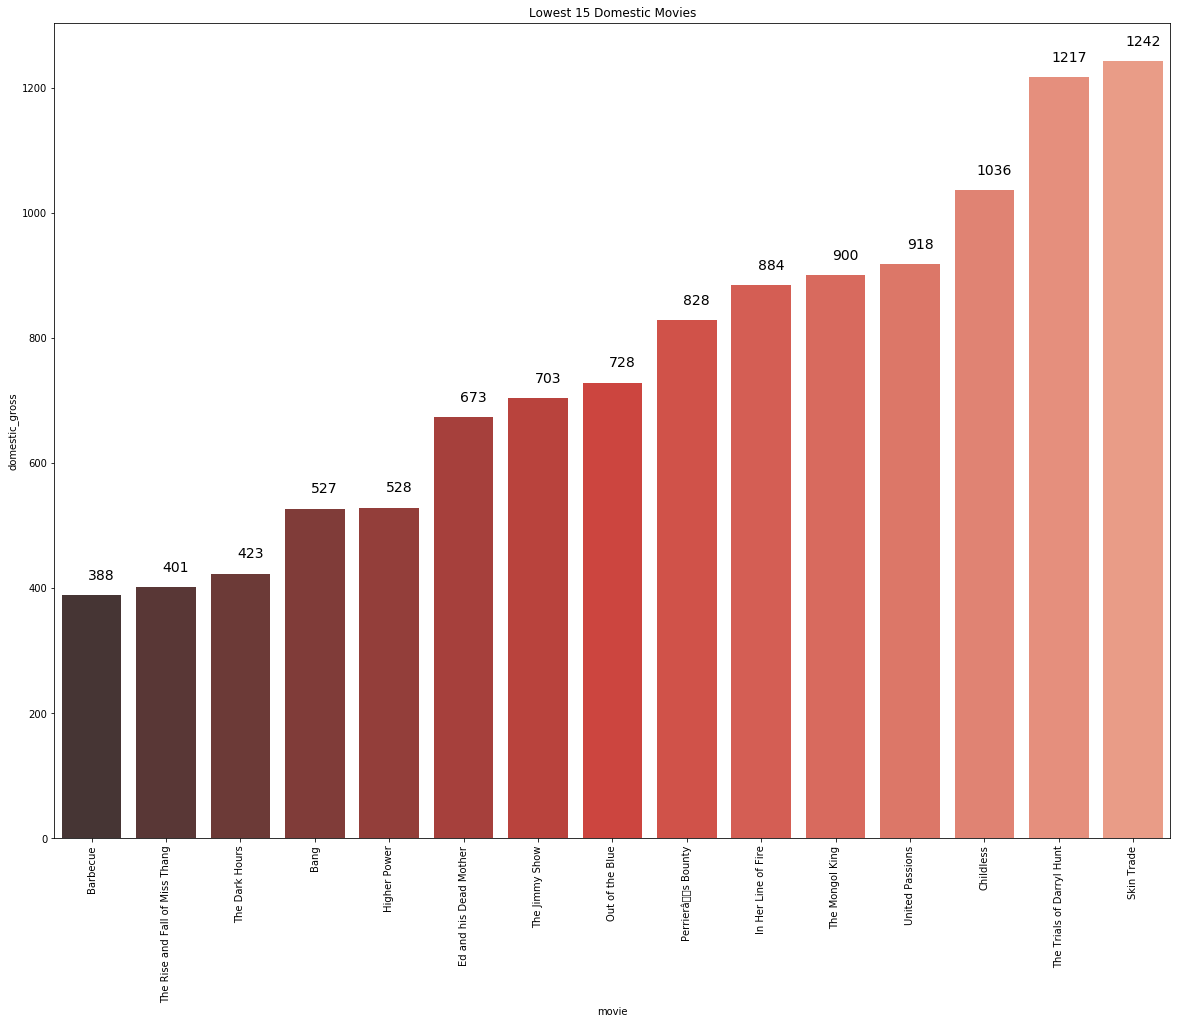

In [29]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.barplot(x="movie", y="domestic_gross", data=low15dom, palette='Reds_d', ax=ax)
ax.set_title('Lowest 15 Domestic Movies')
ax.set_xticklabels(labels=low15dom.movie,rotation=90)
# ax.set_yticklabels(np.arange(0,1500, 100))
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(10, 20),
                 textcoords='offset points');

- found top 15 movies and got top dom and ww gross. then found their genres,grouped them, and plotted those. This is what microsoft should make.
- need to do a batch replace of all those genre ids with all genre names (keeping the multigenres as is) because a movie experience is the sum of its parts

- maybe do the same analysis from the bottom as what not to make

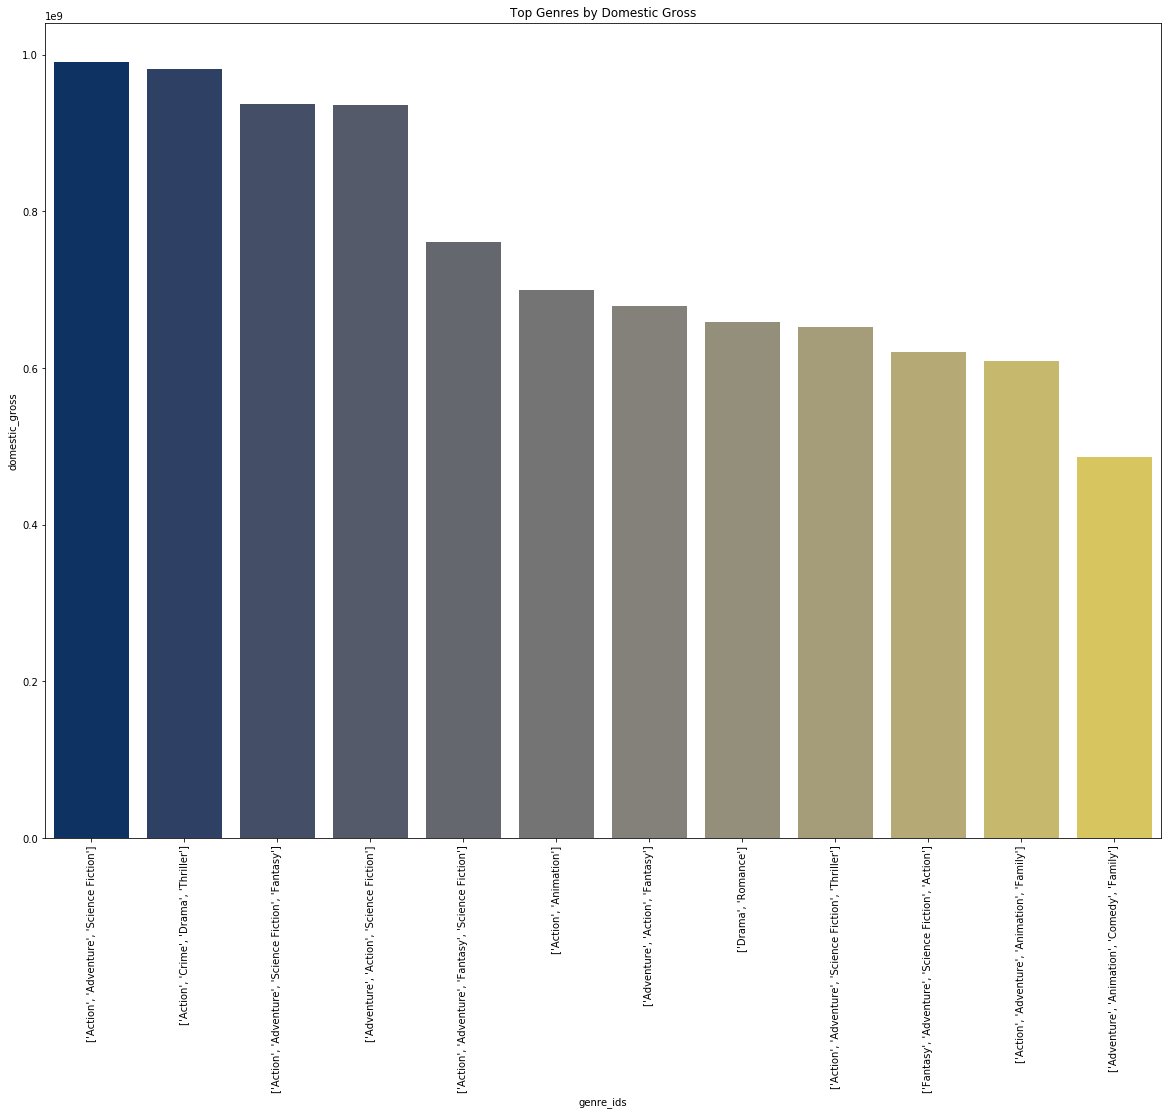

In [30]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.barplot(x=genbar.index, y=genbar.domestic_gross, data=genbar, palette='cividis', ax=ax)
ax.set_title('Top Genres by Domestic Gross')
ax.set_xticklabels(labels=genbar.index,rotation=90);

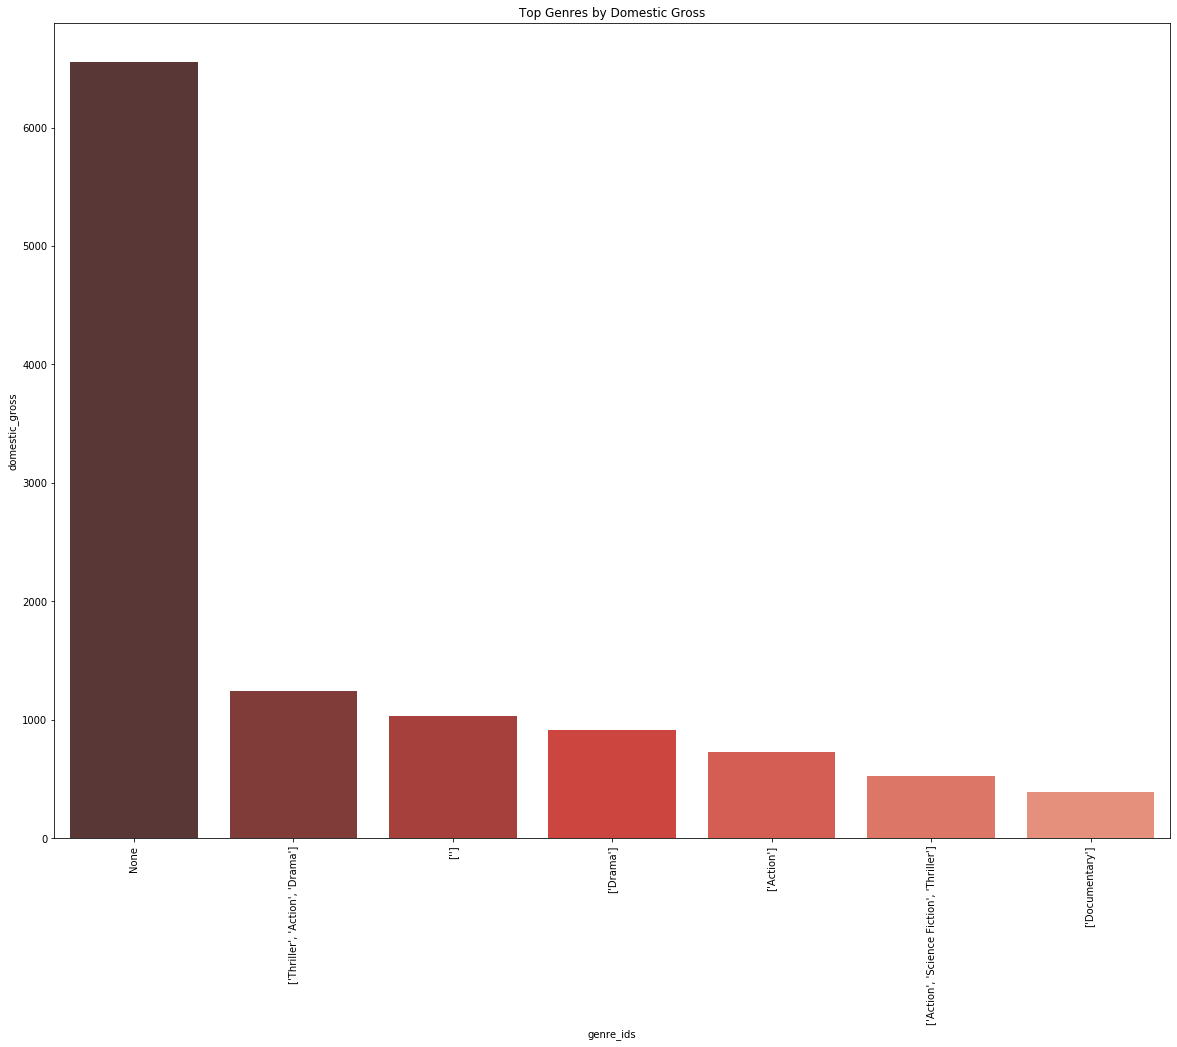

In [31]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.barplot(x=lowgen.index, y=lowgen.domestic_gross, data=lowgen, palette='Reds_d', ax=ax)
ax.set_title('Top Genres by Domestic Gross')
ax.set_xticklabels(labels=lowgen.index,rotation=90);
# fix 3rd column to be include in None for genres

### Chart top 15 movies based on popularity - maybe bottom 15 even though I've filtered out nans - maybe filter nans for genres to be consistent for other charts



In [68]:
# type(gross_df.popularity[2])
popu = gross_df[gross_df['popularity'] > 0]

In [73]:
popu.sort_values(by='popularity', ascending=False).head(20)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,popularity,vote_average,vote_count
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,"['Adventure', 'Action', 'Fantasy']",80.773,8.3,13948
2030,2014-10-24,John Wick,30000000,43037835,76235001,"['Action', 'Thriller']",78.123,7.2,10081
3701,1977-05-25,Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,"['Adventure', 'Action', 'Science Fiction']",60.445,8.2,14211
24,2014-12-17,The Hobbit: The Battle of the Five Armies,250000000,255119788,945577621,"['Action', 'Adventure', 'Fantasy']",53.783,7.3,8392
48,1997-12-19,Titanic,200000000,659363944,2208208395,"['Drama', 'Romance']",50.390,7.9,17632
29,2012-05-04,The Avengers,225000000,623279547,1517935897,"['Science Fiction', 'Action', 'Adventure']",50.289,7.6,19673
1009,1998-08-14,The Avengers,60000000,23385416,48585416,"['Science Fiction', 'Action', 'Adventure']",50.289,7.6,19673
128,2014-08-01,Guardians of the Galaxy,170000000,333172112,770867516,"['Action', 'Science Fiction', 'Adventure']",49.606,7.9,17958
89,2017-10-06,Blade Runner 2049,185000000,92054159,259357408,"['Science Fiction', 'Action', 'Thriller']",48.571,7.4,6679
90,2017-10-06,Blade Runner 2049,185000000,92054159,259357408,"['Science Fiction', 'Action', 'Thriller']",48.571,7.4,6679


In [74]:
top15pop = popu.sort_values(by='popularity', ascending=False).drop_duplicates(subset=['movie'], keep='last').head(15)
# top15ww = gross_df.sort_values(by='worldwide_gross', ascending=False).drop_duplicates(subset=['movie'], keep='last').head(15)
# low15dom = gross_df[gross_df['domestic_gross'] != 0].sort_values(by='domestic_gross', ascending=True).drop_duplicates(subset=['movie'], keep='last').head(15)
# low15ww = gross_df.sort_values(by='worldwide_gross', ascending=True).drop_duplicates(subset=['movie'], keep='last').head(15)



In [75]:
top15pop

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,popularity,vote_average,vote_count
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,"['Adventure', 'Action', 'Fantasy']",80.773,8.3,13948
2030,2014-10-24,John Wick,30000000,43037835,76235001,"['Action', 'Thriller']",78.123,7.2,10081
3701,1977-05-25,Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,"['Adventure', 'Action', 'Science Fiction']",60.445,8.2,14211
24,2014-12-17,The Hobbit: The Battle of the Five Armies,250000000,255119788,945577621,"['Action', 'Adventure', 'Fantasy']",53.783,7.3,8392
48,1997-12-19,Titanic,200000000,659363944,2208208395,"['Drama', 'Romance']",50.390,7.9,17632
1009,1998-08-14,The Avengers,60000000,23385416,48585416,"['Science Fiction', 'Action', 'Adventure']",50.289,7.6,19673
128,2014-08-01,Guardians of the Galaxy,170000000,333172112,770867516,"['Action', 'Science Fiction', 'Adventure']",49.606,7.9,17958
90,2017-10-06,Blade Runner 2049,185000000,92054159,259357408,"['Science Fiction', 'Action', 'Thriller']",48.571,7.4,6679
67,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,200000000,159555901,652220086,['Adventure'],48.508,6.9,4870
112,2017-07-07,Spider-Man: Homecoming,175000000,334201140,880166350,"['Action', 'Adventure', 'Science Fiction', 'Dr...",46.775,7.4,11585


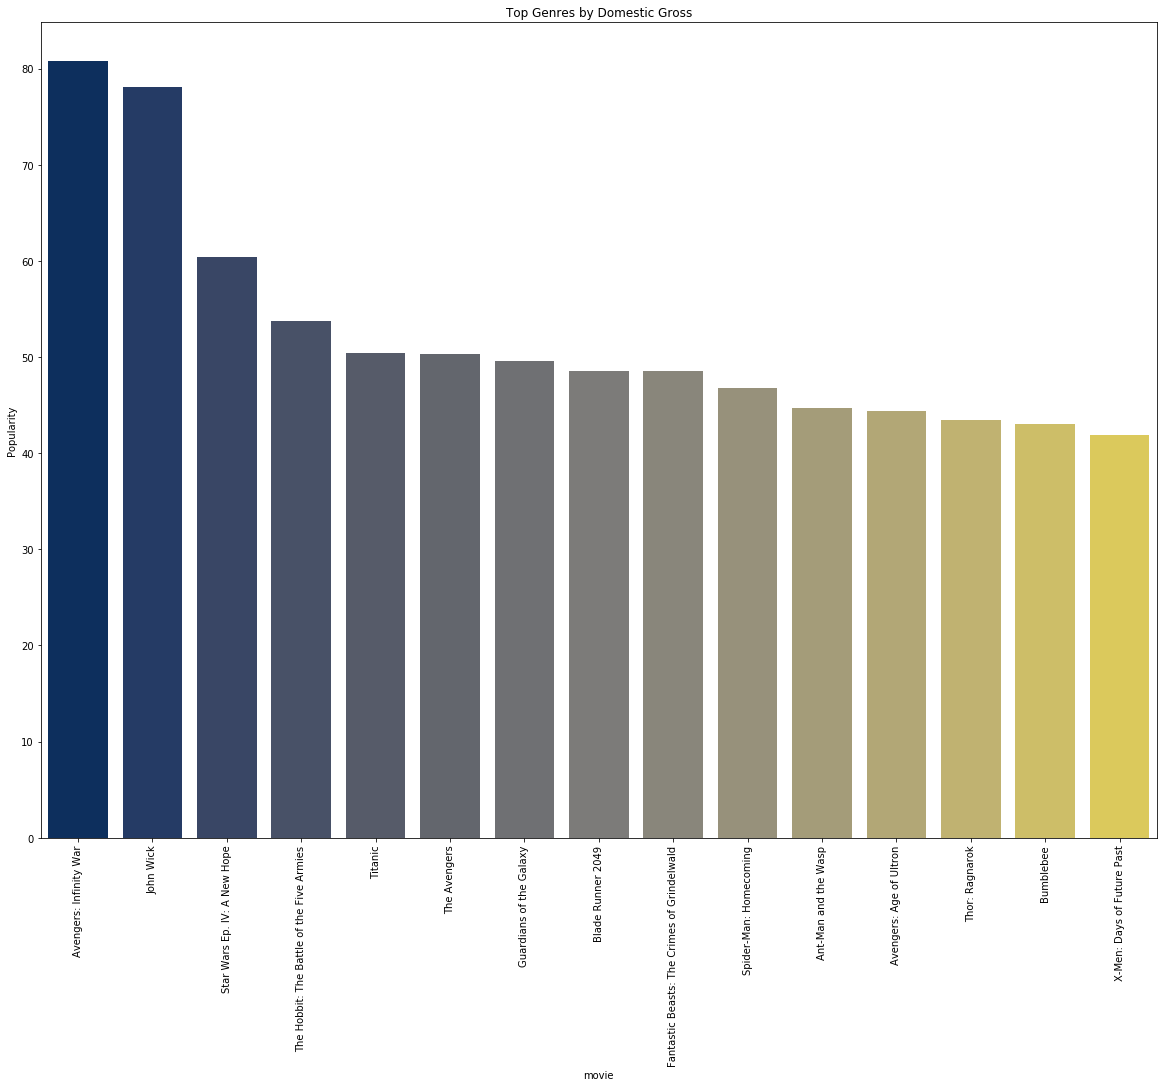

In [88]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.barplot(x=top15pop.movie, y=top15pop.popularity, data=top15pop, palette='cividis', ax=ax)
ax.set_title('Top Genres by Domestic Gross')
ax.set_xticklabels(labels=top15pop.movie,rotation=90)
ax.set_ylabel('Popularity');

# ax2 = ax.twinx()

### find a way to plot popularity against dom and ww gross. maybe plot production budget against dom and ww gross too. 

### think about plotly